# NN-Subsampling Algorithm

The sampling algorithm is an iterative process based on Nearest Neighbour search. 

In each iteration, the dataset is normalized with the standard scaler (mean = 0, standard deviation = 1) and a nearest-neighbour model is constructed and queried to find the nearest neighbor for each data point as well as the distance between them. If the distance is below a certain cutoff distance, the neighbor is removed with some probability. The process is iterated until there are no more points to be removed. 

The algorithm has two hyper-parameters: cutoff distance and deletion probability (rate). 

The cutoff distance controls the sparsity of the resulting representative dataset. Higher cutoff distances resulting in fewer sub-sampled points.
The deletion probability controls robustness. Lower deletion probablibity is more robust but resulting in slower execution. High deletion probablity might result in a "hole" in the subsampled dataset

High-dimensional datasets may also be pre-processed by principal component analysis (PCA) to reduce the dimensionality prior to subsampling


The illustration of the subsampling procedure is shown in the Figure below

<center>
    <img src="./subsample_schema.JPG" width = 500>
</center>

The Nearest-Neighbour search uses one of the packages below:

* FLANN: http://www.cs.ubc.ca/research/flann/

* pykdtree: https://github.com/storpipfugl/pykdtree

* Annoy: https://github.com/spotify/annoy

* nmslib: https://github.com/nmslib/nmslib/tree/master/python_bindings

* scipy cKDTree

* scikit-learn nearest neighbor

Please make sure you have at least one of these packages installed before trying the algorithm (also remember to specify the method in your script)

Also note that different packages may (sometimes very significantly) in speed, efficiency and result

## importing the functions

In [1]:
from NNSubsampling import subsampling, subsampling_with_PCA, \
                          batch_subsampling, batch_subsampling_with_PCA

TabError: inconsistent use of tabs and spaces in indentation (NNSubsampling.py, line 131)

## Detailed Explanations of the Functions
### Subsampling

subsampling(data, list_desc = [], standard_scale = True, cutoff_sig = 0.05, rate = 0.3, method = "pykdtree", verbose = 1):
    
    Run the NN-based subsampling algorithm to a list of data points and 
    return the resulting list of subsampled data points
    

    Parameters
    -------------
    data: List. the original list of data points
    
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
    
    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [1]: integer. level of verbosity
    
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

    

### subsampling_with_PCA
subsampling_with_PCA(data, list_desc = [], standard_scale = True, cutoff_sig = 0.05, rate = 0.3, 
                                start_trial_component = 10, max_component = 30, target_variance = 0.999999, 
                                method = "pykdtree", verbose = 1):
    
    Run the NN-based subsampling algorithm to a list of data points and 
    return the resulting list of subsampled data points
    
    The data set will first be transformed by PCA, before running the subsampling algorithm
    The number of PCs kept is the minimal number of PCs that have sum explained variance 
    greater than target_variance 
    
    Note that the final resulting list of datapoints (sampling_result) is NOT transformed
    (since we only used the PCA + subsampling alghorithm to find the indices of the datapoints to be kept)
    

    Parameters
    -------------
    data: List. the original list of data points
   
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
    
    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    start_trial_component [10]: Int. minimum number of PCs.
                           if the number of features is below this number, then all features will be kept
    
    max_component [30]: Int.the maximum number of PCs to be kept, 
                        even the target variance has not been reached
    
    target_variance [0.999999]: Float. the target sum of variance. 
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [1]: integer. level of verbosity
    
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

### batch_subsampling
batch_subsampling(data, list_desc = [], batch_size = 1000000, recursive_level = 1, 
                             standard_scale = True, cutoff_sig = 0.05, rate = 0.3, method = "pykdtree", 
                             verbose = 1, shuffle = True):

    Subsample with batch
    This is to save the memory if the data set of interest is too large.
    
    The data set will first be broken down into equally sized batchs (defined by batch size)
    that will be subsampled individually.
    The resulting subsampled datapoints will then be pooled together for a overall subsample
    
    In case this is not sufficient, multi-level batch subsampling is also allowed.
    So instead of a overall subsample after pooling the resulting subsampled datapoints,
    the pooled data points will again be broken down into batches for a second-level batch subsample.
    This process is repeated multiple times (as defined by recursive_level) before eventually an 
    overall subsample is performed
    
    
    Parameters
    -------------
    data: List. the original list of data points
    
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
                
    batch_size [1000000]: Int. the number of datapoints in each batch
    
    recursive_level [1]: Int. the number of levels for batch subsampling (as described above)

    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [1]: integer. level of verbosity
    
    shuffle [True]: Boolean. whether to shuffle the dataset before breaking down into batchs
    
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

### batch_subsampling_with_PCA

batch_subsampling_with_PCA(data, list_desc = [], batch_size = 1000000, recursive_level = 1, 
                             start_trial_component = 10, max_component = 30, target_variance = 0.999999, 
                             standard_scale = True, cutoff_sig = 0.05, rate = 0.3, method = "pykdtree", 
                             verbose = 1, shuffle = True):
    
    '''
    Subsample with batch (with PCA pre-processing)
    This is to save the memory if the data set of interest is too large.
    
    The data set will first be broken down into equally sized batchs (defined by batch size)
    that will be subsampled individually.
    The resulting subsampled datapoints will then be pooled together for a overall subsample
    
    In case this is not sufficient, multi-level batch subsampling is also allowed.
    So instead of a overall subsample after pooling the resulting subsampled datapoints,
    the pooled data points will again be broken down into batches for a second-level batch subsample.
    This process is repeated multiple times (as defined by recursive_level) before eventually an 
    overall subsample is performed
    
    
    Parameters
    -------------
    data: List. the original list of data points
    
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
                
    batch_size [1000000]: Int. the number of datapoints in each batch
    
    recursive_level [1]: Int. the number of levels for batch subsampling (as described above)

    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    start_trial_component [10]: Int. minimum number of PCs.
                           if the number of features is below this number, then all features will be kept
    
    max_component [30]: Int.the maximum number of PCs to be kept, 
                        even the target variance has not been reached
    
    target_variance [0.999999]: Float. the target sum of variance. 
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [1]: integer. level of verbosity
    
    shuffle [True]: Boolean. whether to shuffle the dataset before breaking down into batchs
    
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

# Tutorial and Tests

### prepare plot function and dataset

Multi-dimensional normal distributed dataset

In [2]:
import time
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
def plot(data):
    
    x_subsampled = data[:,0]
    y_subsampled = data[:,1]

    dataframe = pd.DataFrame({'x':x_subsampled, 'y':y_subsampled, 'group':np.repeat('subsampled',len(x_subsampled))})
    sns.set(font_scale = 2)
    with sns.axes_style('white'):
        g = sns.JointGrid(x="x", y="y",data=dataframe,space=0)
        g = g.plot_joint(plt.scatter, color = "b", s=30)

        g.set_axis_labels(fontsize=50)

        count = lambda a, b: len(a)
        g.annotate(count, template="{val:.0f}",stat="Count",loc="upper right", fontsize = 20)

        _ = g.ax_marg_x.hist(dataframe["x"], color = "b", alpha = 0.6, bins = np.arange(-0.5, 0.5, 0.02))
        _ = g.ax_marg_y.hist(dataframe["y"], color = "b", alpha = 0.6, orientation = "horizontal",bins = np.arange(0, 200, 4))
        plt.show()
    return

n = 1000000
x1_mu, x1_sigma = 0, 0.1
x2_mu, x2_sigma = 100, 20
x3_mu, x3_sigma = 15, 40
x4_mu, x4_sigma = -20, 5
x5_mu, x5_sigma = 1000, 0.1
x6_mu, x7_sigma = 0.0, 30
x7_mu, x6_sigma = 12, 2
x8_mu, x8_sigma = 50, 40
x9_mu, x9_sigma = 5, 20
x10_mu, x10_sigma = 10, 2


x1 = np.random.normal(x1_mu, x1_sigma, n)
x2 = np.random.normal(x2_mu, x2_sigma, n)
x3 = np.random.normal(x3_mu, x3_sigma, n)
x4 = np.random.normal(x4_mu, x4_sigma, n)
x5 = np.random.normal(x5_mu, x5_sigma, n)
x6 = np.random.normal(x6_mu, x6_sigma, n)
x7 = np.random.normal(x7_mu, x7_sigma, n)
x8 = np.random.normal(x8_mu, x8_sigma, n)
x9 = np.random.normal(x9_mu, x9_sigma, n)
x10 = np.random.normal(x10_mu, x10_sigma, n)

## Tutorials

1,000,000 Multi-dimensional normally distributed data points.

we will only use the "pykdtree" backend in the tutorial

### Tutorial 1: 2D toy case, with different rate and cutoff_sig

1. higher rate --> fewer iterations, faster execution, but less nicely distributed results
2. higher cutoff_sig --> more sparse resulting subsampled datapoints


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


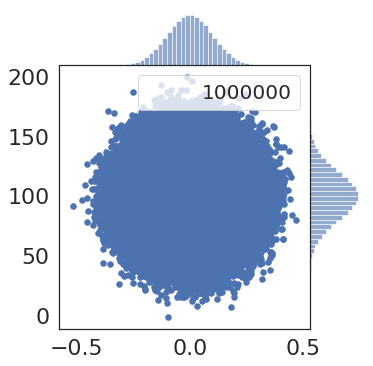

In [3]:
data_2D = np.column_stack((x1,x2))
plot(data_2D)

#### subsample with cutoff_sig = 0.05, rate = 0.2

In [4]:
subsampled = np.asarray(subsampling(data_2D,list_desc = [],cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = 2))

plot(subsampled)

NameError: name 'subsampling' is not defined

#### subsample with cutoff_sig = 0.1, rate = 0.6

In [ ]:
subsampled = np.asarray(subsampling(data_2D,list_desc = [],cutoff_sig=0.1,rate=0.6, method = "pykdtree",verbose = 2))

plot(subsampled)

#### subsample with cutoff_sig = 0.4, rate = 0.2

In [ ]:
subsampled = np.asarray(subsampling(data_2D,list_desc = [],cutoff_sig=0.4,rate=0.2, method = "pykdtree",verbose = 2))

plot(subsampled)

### Tutorial 2: Subsample based on subset of features

In this case subsample based on feature 1 of the 2D dataset

In [ ]:
subsampled = np.asarray(subsampling(data_2D,list_desc = [0],cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = 1))

plot(subsampled)

### Tutorial 3: Subsample with PCA-preprocessing for high-dimensional dataset

we will demostrate with a 10-D dataset

PCA is first done on the dataset, and first N PCs that captured 99% variance of the 
original dataset are used to subsample the dataset

Note although the dataset is subsampled with PCs, the resulting subsampled dataset is
not PCA transformed

In [ ]:
temp = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))

print("original dataset shape: {}".format(temp.shpae))

subsampled = subsampling_with_PCA(temp,list_desc = [], start_trial_component = 5, max_component = 10, \
                                  target_variance = 0.99, cutoff_sig=1.0,rate=0.2, \
                                  method = "pykdtree",verbose = 1)

print("result dataset shape: {}".format(np.array(subsampled).shpae))

### Tutorial 4: Batch subsample with for large dataset

Batch subsampling with 100,000 and 10,000 batch sizes were tested. 2 observations could be made:

1. subsampling based on small batchs sucessfully lowered the cost of the subsampling algorithm
2. seems the resulting sabsampled datasets are much more sparse

#### 100,000 datapoints in a batch, with 2 levels of batch subsample
subsample with cutoff_sig = 0.1, rate = 0.2

In [ ]:
start = time.time()
subsampled = np.array(batch_subsampling(data_2D,list_desc = [], batch_size = 100000, recursive_level = 1, \
                                                      cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = 1))

print("total time: {}".format(time.time()-start))

plot(subsampled)

#### 10,000 datapoints in a batch, with 2 levels of batch subsample
subsample with cutoff_sig = 0.1, rate = 0.2

In [ ]:
start = time.time()
temp_subsampled = np.array(batch_subsampling(data_2D,list_desc = [], batch_size = 10000, recursive_level = 2, \
                                                      cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = 1))

print("total time: {}".format(time.time()-start))

plot(subsampled)

## Tests

### Test 1: scaling in multiple dimensions with different backend

2 different backends were tested

1. pykdtree backend seems to be very efficient for lower dimension dataset, but scales badly with number of dimensions

2. nmslib backed performed much worse for lower dimension datasets, but scales better with dimension

#### pykdtree backend

In [ ]:
temp = np.column_stack((x1,x2))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "pykdtree",verbose = False)

print("2 dimensions, total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "pykdtree",verbose = False)

print("5 dimensions,total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "pykdtree",verbose = False)

print("10 dimensions total time: {}\n\n".format(time.time()-start))

#### nmslib backend

In [ ]:
temp = np.column_stack((x1,x2))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "nmslib",verbose = False)

print("2 dimensions, total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "nmslib",verbose = False)

print("5 dimensions,total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "nmslib",verbose = False)

print("10 dimensions total time: {}\n\n".format(time.time()-start))

### Test 2: MNIST dataset test

subsampling with PCA pre-processing and different backends

In [ ]:
from mlxtend.data import loadlocal_mnist
from matplotlib import pyplot as plt

X, y = loadlocal_mnist(
        images_path='./train-images-idx3-ubyte', 
        labels_path='./train-labels-idx1-ubyte')


In [ ]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "nmslib", verbose = 1)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()

In [ ]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "pykdtree", verbose = 1)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()

In [ ]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "annoy", verbose = 1)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()

### Test 3: fashion-MNIST dataset test

subsampling with PCA pre-processing and different backend

In [ ]:
X, y = loadlocal_mnist(
        images_path='./train-fasion-images-idx3-ubyte', 
        labels_path='./train-fasion-labels-idx1-ubyte')

In [ ]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "nmslib", verbose = 1)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()

In [ ]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "pykdtree", verbose = 1)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()

In [ ]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "annoy", verbose = 1)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()